<a href="https://colab.research.google.com/github/Md-Thahir/AI-Tools-Lab/blob/main/SpectraLume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the model files (prototxt, caffemodel, and pts_in_hull.npy) and the image file.


Saving 1.jpeg to 1 (3).jpeg
Saving 2.jpeg to 2 (4).jpeg
Saving 3.jpeg to 3 (1).jpeg
Saving 4.jpeg to 4.jpeg
Saving 5.jpeg to 5 (1).jpeg
Loading the neural network model...
Neural network loaded successfully.
Processing the input image...
Running the neural network to predict colorization...
Colorization completed.
Merged the input and output images with labels.


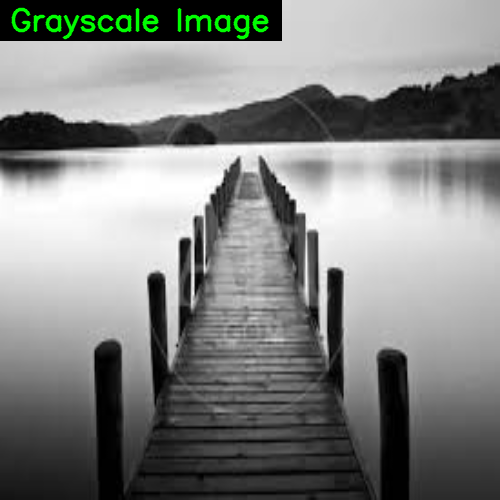

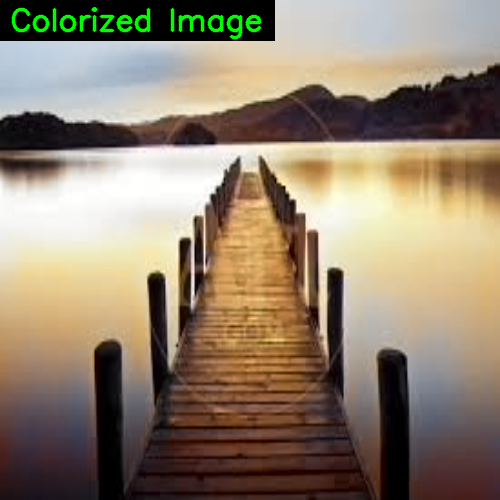

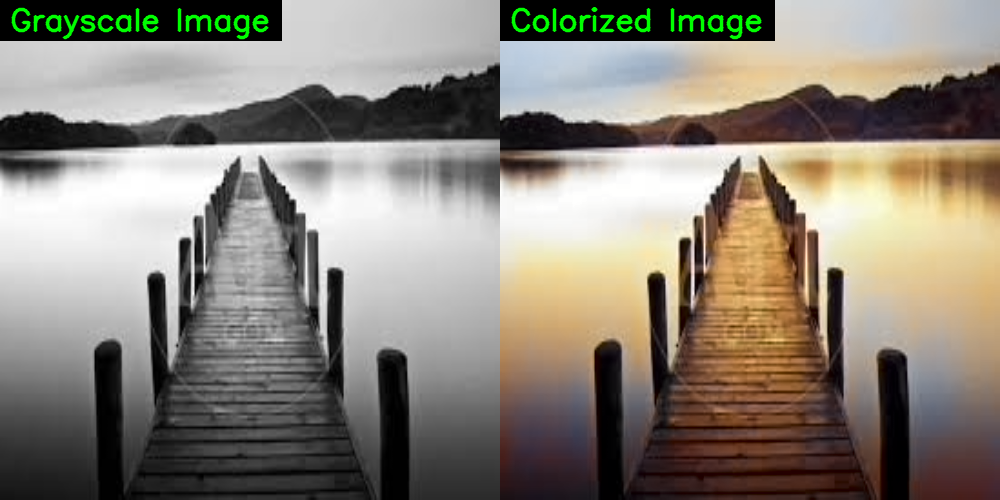

Merged image with labels saved as /content/merged_image_with_labels.jpeg
You can download the merged image with labels using the link below:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import numpy as np
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload the model files and the input image
print("Please upload the model files (prototxt, caffemodel, and pts_in_hull.npy) and the image file.")
uploaded_files = files.upload()

# Update the paths based on the uploaded files
prototxt_path = '/content/drive/MyDrive/Project/SpectraLume/Models/colorization_deploy_v2.prototxt'
model_path = '/content/drive/MyDrive/Project/SpectraLume/Models/colorization_release_v2.caffemodel'
kernel_path = '/content/drive/MyDrive/Project/SpectraLume/Models/pts_in_hull.npy'

# Assuming the image file was uploaded, use the uploaded image's filename
image_path = list(uploaded_files.keys())[0]

print("Loading the neural network model...")
# Load the network and cluster centers
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)
points = np.load(kernel_path)

# Prepare the kernel (cluster centers)
points = points.transpose().reshape(2, 313, 1, 1)
net.getLayer(net.getLayerId("class8_ab")).blobs = [points.astype(np.float32)]
net.getLayer(net.getLayerId("conv8_313_rh")).blobs = [np.full([1, 313], 2.606, dtype="float32")]
print("Neural network loaded successfully.")

print("Processing the input image...")
# Load and resize the grayscale image
bw_image = cv2.imread(image_path)
small_size = (500, 500)  # Target size for smaller image
bw_image_resized = cv2.resize(bw_image, small_size)
normalized = bw_image_resized.astype("float32") / 255.0

# Convert the image from BGR to LAB color space
lab = cv2.cvtColor(normalized, cv2.COLOR_BGR2LAB)

# Resize the L channel to 224x224 as expected by the model
resized = cv2.resize(lab, (224, 224))
L = cv2.split(resized)[0]
L -= 50  # Mean-centering

# Pass the L channel to the network
print("Running the neural network to predict colorization...")
net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

# Resize the output to the small image size (150x150)
ab = cv2.resize(ab, small_size)

# Combine the original L channel with the predicted a*b* channels
L = cv2.split(lab)[0]
colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

# Convert the LAB image back to BGR
colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
colorized = (255.0 * colorized).astype("uint8")  # Convert to uint8
print("Colorization completed.")

# Function to add text label to an image
def add_label(image, label, position=(10, 30), font_scale=1, color=(0, 255, 0), thickness=2):
    """Add a text label to an image with a background for better visibility."""
    font = cv2.FONT_HERSHEY_SIMPLEX
    (text_width, text_height), _ = cv2.getTextSize(label, font, font_scale, thickness)
    x, y = position
    # Draw a filled rectangle as background for the text
    cv2.rectangle(image, (x - 10, y - text_height - 10), (x + text_width + 10, y + 10), (0, 0, 0), -1)
    # Add text on top of the rectangle
    cv2.putText(image, label, (x, y), font, font_scale, color, thickness, cv2.LINE_AA)

# Label images
add_label(bw_image_resized, "Grayscale Image")
add_label(colorized, "Colorized Image")

# Merge the original and colorized images side by side
merged_image = np.hstack((bw_image_resized, colorized))
#add_label(merged_image, "Grayscale Image + Colorized Image", position=(15, 50), font_scale=1, color=(255, 255, 255), thickness=2)

print("Merged the input and output images with labels.")

# Display the images with labels
cv2_imshow(bw_image_resized)
cv2_imshow(colorized)
cv2_imshow(merged_image)

# Save and provide a download option for the merged image
merged_image_path = '/content/merged_image_with_labels.jpeg'
cv2.imwrite(merged_image_path, merged_image)
print(f"Merged image with labels saved as {merged_image_path}")

print("You can download the merged image with labels using the link below:")
files.download(merged_image_path)


Please upload the model files (prototxt, caffemodel, and pts_in_hull.npy) and image files.


Saving 1.jpeg to 1 (5).jpeg
Saving 2.jpeg to 2 (6).jpeg
Saving 3.jpeg to 3 (3).jpeg
Saving 4.jpeg to 4 (2).jpeg
Saving 5.jpeg to 5 (3).jpeg
Loading the neural network model...
Neural network loaded successfully.
Processing the image: 1 (5).jpeg
Running the neural network to predict colorization...
Colorization completed.


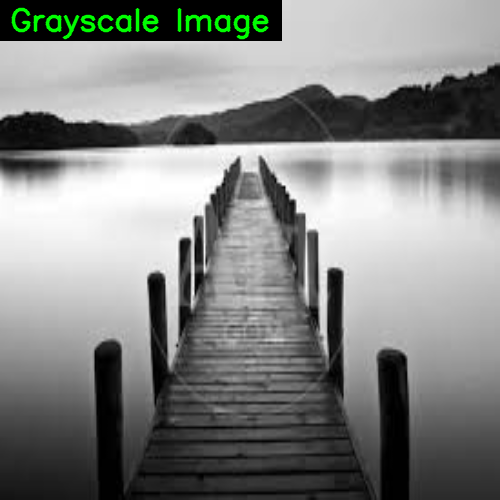

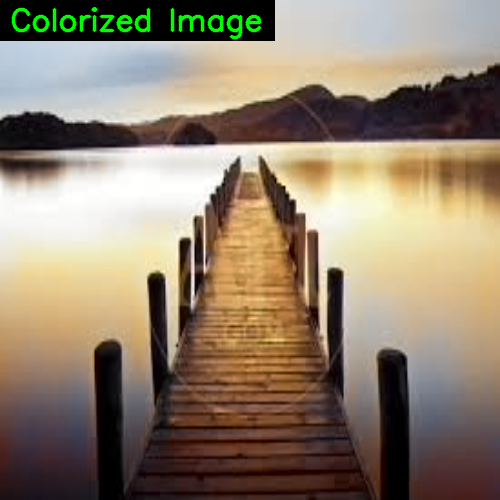

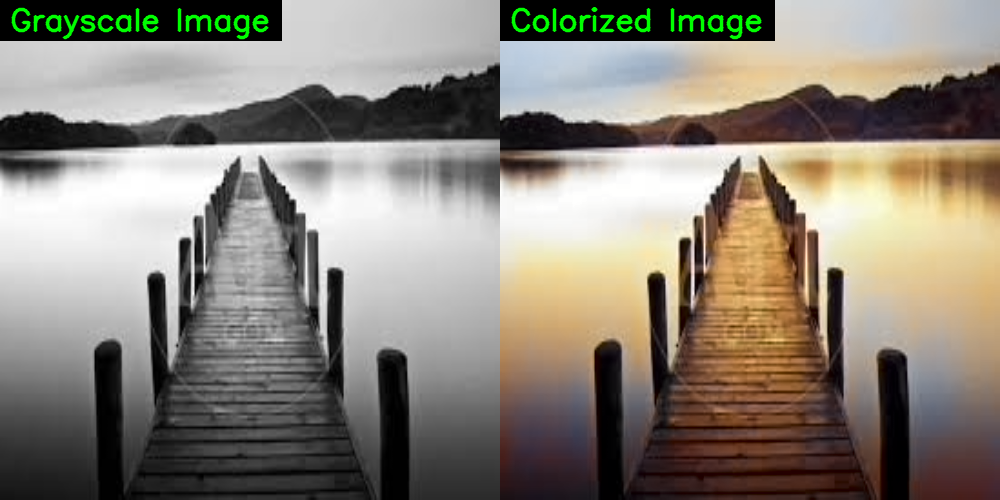

Merged image with labels saved as /content/merged_image_1 (5)_with_labels.jpeg
You can download the merged image with labels using the link below:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing the image: 2 (6).jpeg
Running the neural network to predict colorization...
Colorization completed.


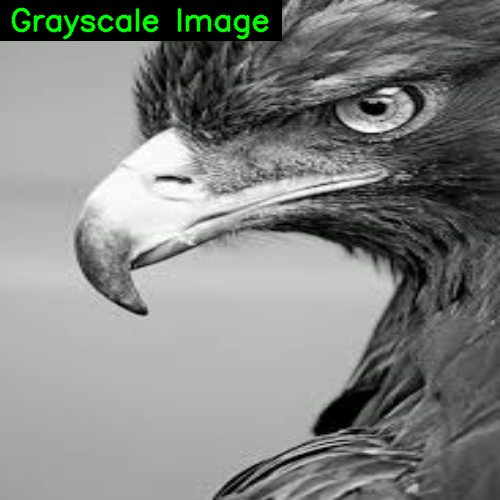

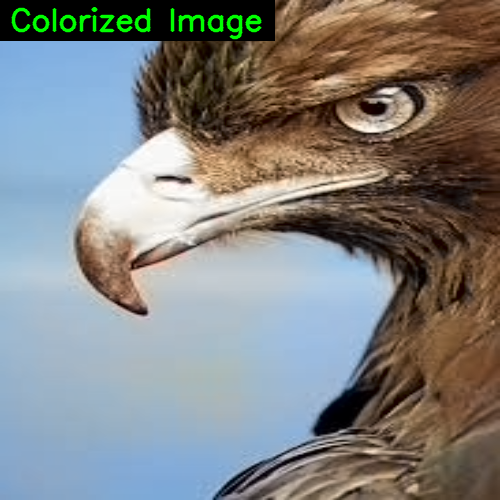

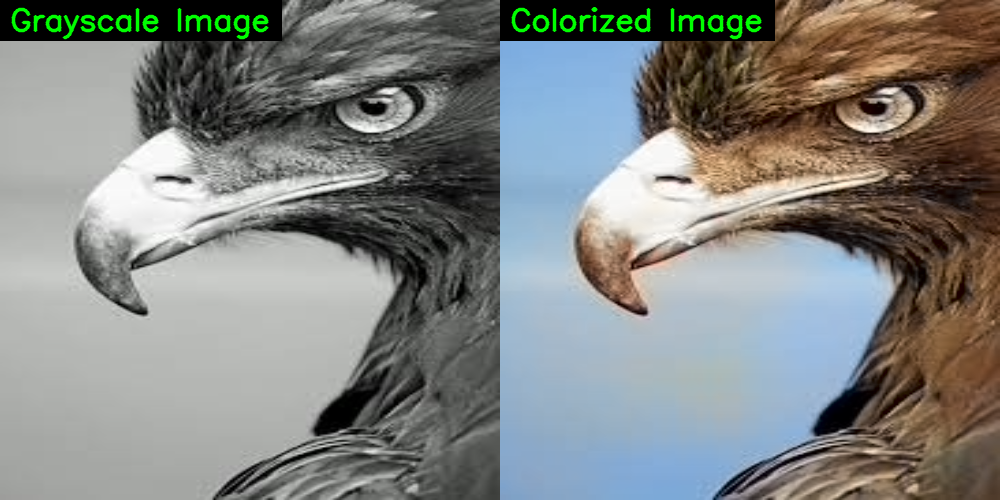

Merged image with labels saved as /content/merged_image_2 (6)_with_labels.jpeg
You can download the merged image with labels using the link below:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing the image: 3 (3).jpeg
Running the neural network to predict colorization...
Colorization completed.


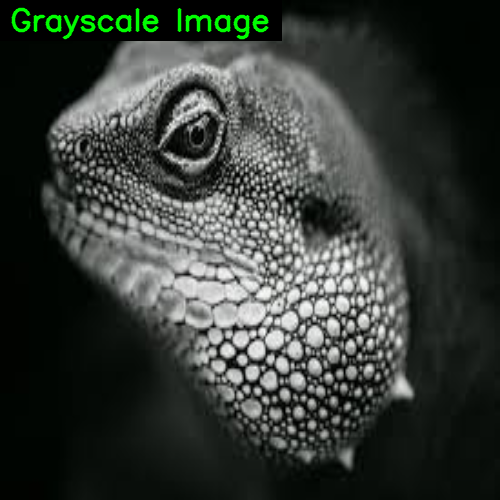

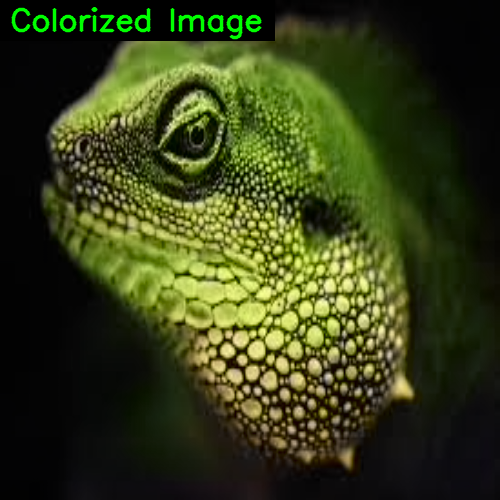

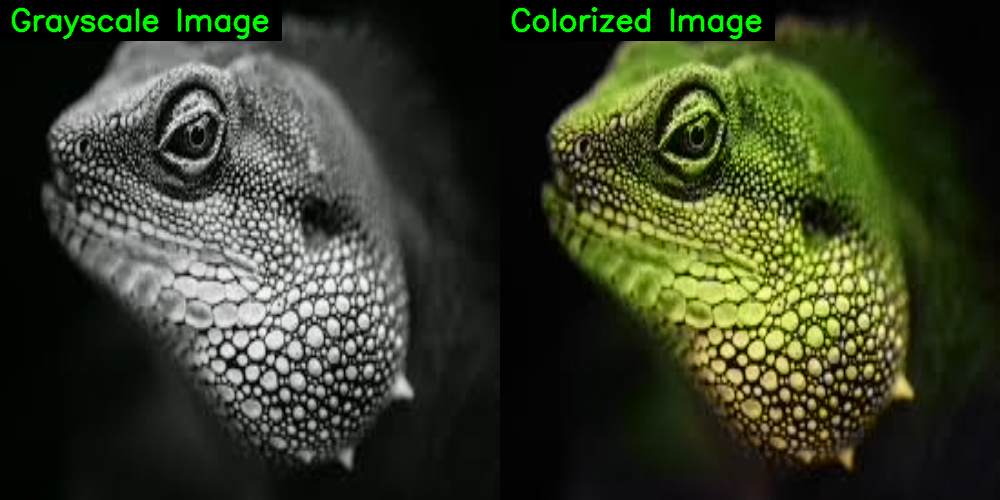

Merged image with labels saved as /content/merged_image_3 (3)_with_labels.jpeg
You can download the merged image with labels using the link below:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing the image: 4 (2).jpeg
Running the neural network to predict colorization...
Colorization completed.


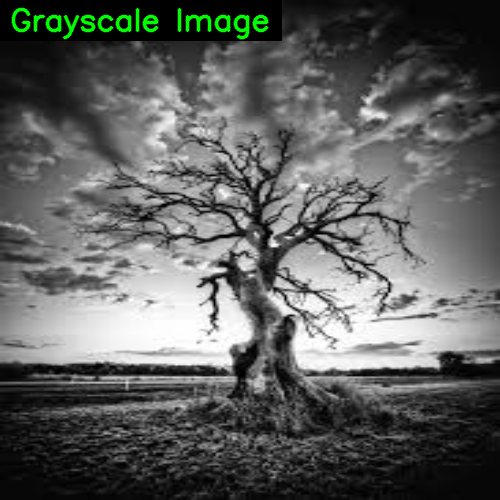

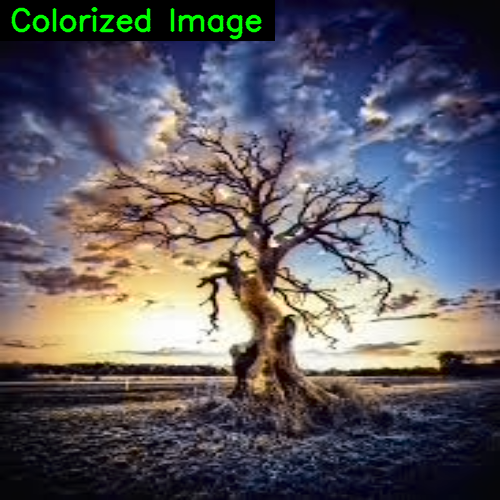

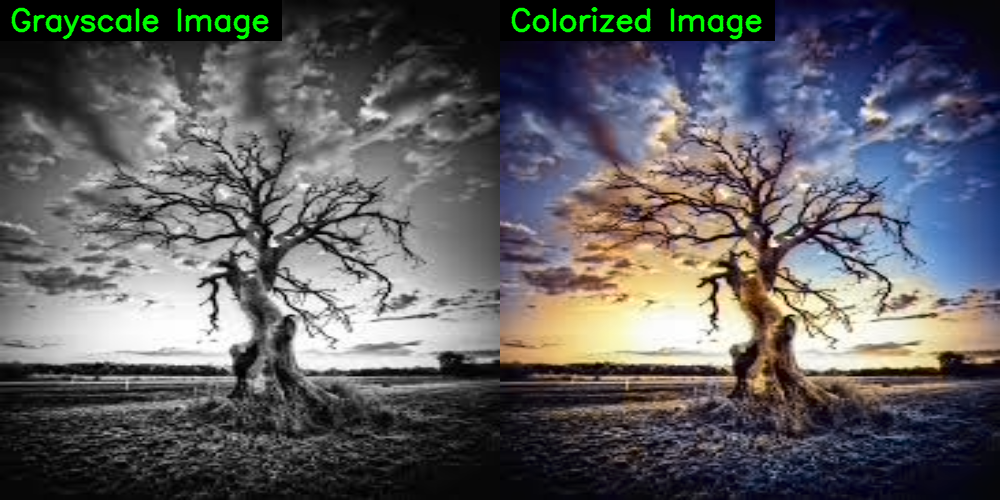

Merged image with labels saved as /content/merged_image_4 (2)_with_labels.jpeg
You can download the merged image with labels using the link below:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing the image: 5 (3).jpeg
Running the neural network to predict colorization...
Colorization completed.


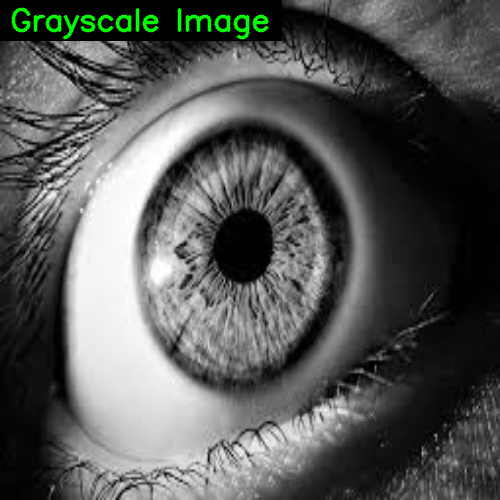

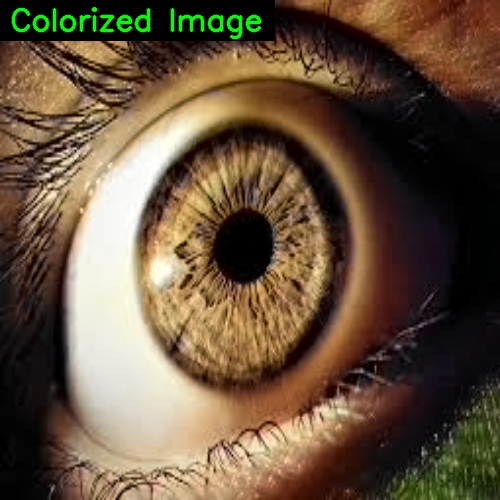

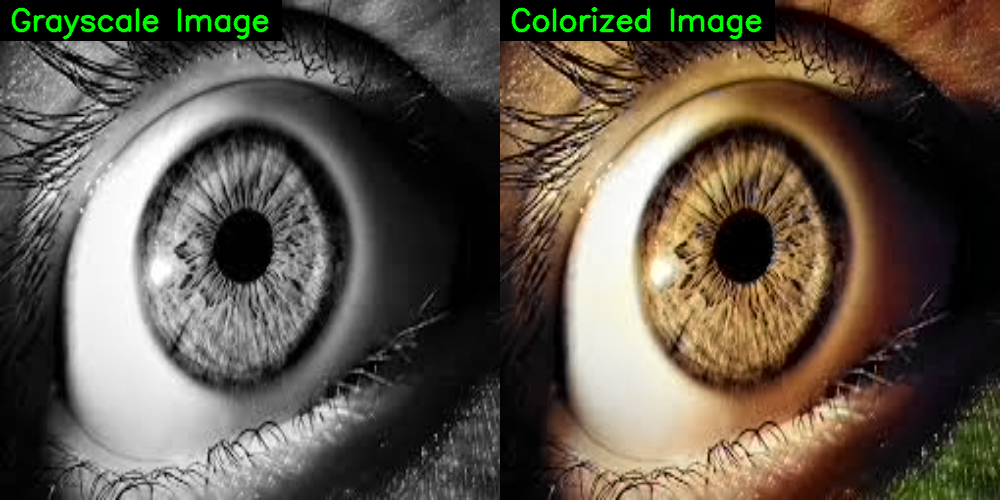

Merged image with labels saved as /content/merged_image_5 (3)_with_labels.jpeg
You can download the merged image with labels using the link below:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import numpy as np
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow
import os

# Function to add text label to an image
def add_label(image, label, position=(10, 30), font_scale=1, color=(0, 255, 0), thickness=2):
    """Add a text label to an image with a background for better visibility."""
    font = cv2.FONT_HERSHEY_SIMPLEX
    (text_width, text_height), _ = cv2.getTextSize(label, font, font_scale, thickness)
    x, y = position
    # Draw a filled rectangle as background for the text
    cv2.rectangle(image, (x - 10, y - text_height - 10), (x + text_width + 10, y + 10), (0, 0, 0), -1)
    # Add text on top of the rectangle
    cv2.putText(image, label, (x, y), font, font_scale, color, thickness, cv2.LINE_AA)

# Upload the model files and the input images
print("Please upload the model files (prototxt, caffemodel, and pts_in_hull.npy) and image files.")
uploaded_files = files.upload()

# Update the paths based on the uploaded files
prototxt_path = '/content/drive/MyDrive/Project/SpectraLume/Models/colorization_deploy_v2.prototxt'
model_path = '/content/drive/MyDrive/Project/SpectraLume/Models/colorization_release_v2.caffemodel'
kernel_path = '/content/drive/MyDrive/Project/SpectraLume/Models/pts_in_hull.npy'

# Check if the uploaded files include the model files and images
model_files_uploaded = all(
    os.path.exists(p) for p in [prototxt_path, model_path, kernel_path]
)

if not model_files_uploaded:
    print("Error: Model files are missing. Please upload the required model files.")
else:
    print("Loading the neural network model...")
    # Load the network and cluster centers
    net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)
    points = np.load(kernel_path)

    # Prepare the kernel (cluster centers)
    points = points.transpose().reshape(2, 313, 1, 1)
    net.getLayer(net.getLayerId("class8_ab")).blobs = [points.astype(np.float32)]
    net.getLayer(net.getLayerId("conv8_313_rh")).blobs = [np.full([1, 313], 2.606, dtype="float32")]
    print("Neural network loaded successfully.")

    # Process each uploaded image
    for image_name in uploaded_files.keys():
        if image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            print(f"Processing the image: {image_name}")

            # Load and resize the grayscale image
            bw_image = cv2.imread(image_name)
            small_size = (500, 500)  # Target size for smaller image
            bw_image_resized = cv2.resize(bw_image, small_size)
            normalized = bw_image_resized.astype("float32") / 255.0

            # Convert the image from BGR to LAB color space
            lab = cv2.cvtColor(normalized, cv2.COLOR_BGR2LAB)

            # Resize the L channel to 224x224 as expected by the model
            resized = cv2.resize(lab, (224, 224))
            L = cv2.split(resized)[0]
            L -= 50  # Mean-centering

            # Pass the L channel to the network
            print("Running the neural network to predict colorization...")
            net.setInput(cv2.dnn.blobFromImage(L))
            ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

            # Resize the output to the small image size (150x150)
            ab = cv2.resize(ab, small_size)

            # Combine the original L channel with the predicted a*b* channels
            L = cv2.split(lab)[0]
            colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

            # Convert the LAB image back to BGR
            colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
            colorized = (255.0 * colorized).astype("uint8")  # Convert to uint8
            print("Colorization completed.")

            # Label images
            add_label(bw_image_resized, "Grayscale Image")
            add_label(colorized, "Colorized Image")

            # Merge the original and colorized images side by side
            merged_image = np.hstack((bw_image_resized, colorized))
           # add_label(merged_image, "Grayscale Image + Colorized Image", position=(15, 50), font_scale=1, color=(255, 255, 255), thickness=2)

            # Display the images with labels
            cv2_imshow(bw_image_resized)
            cv2_imshow(colorized)
            cv2_imshow(merged_image)

            # Save and provide a download option for the merged image
            merged_image_path = f'/content/merged_image_{os.path.splitext(image_name)[0]}_with_labels.jpeg'
            cv2.imwrite(merged_image_path, merged_image)
            print(f"Merged image with labels saved as {merged_image_path}")

            print("You can download the merged image with labels using the link below:")
            files.download(merged_image_path)
        else:
            print(f"Skipped non-image file: {image_name}")
